In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Load Data

In [252]:
# Import gold data
df_gold = pd.read_csv('Gold Futures Historical Data.csv')

In [273]:
# Import silver data
df_silver = pd.read_csv('Silver Futures Historical Data.csv')

In [253]:
df_gold.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,6-Jun-19,"1,337.65","1,335.25","1,344.15","1,331.35",-,0.70%
1,5-Jun-19,"1,328.30","1,328.90","1,343.30","1,326.30",0.62K,0.37%
2,4-Jun-19,"1,323.40","1,324.30","1,328.60","1,320.80",0.30K,0.05%
3,3-Jun-19,"1,322.70","1,307.00","1,327.80","1,307.00",0.81K,1.29%
4,31-May-19,"1,305.80","1,287.70","1,306.40","1,287.50",2.81K,1.45%


In [274]:
df_silver.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jun 06, 2019",14.857,14.793,14.988,14.732,-,0.43%
1,"Jun 05, 2019",14.793,14.812,15.037,14.758,-,-0.09%
2,"Jun 04, 2019",14.807,14.768,14.848,14.648,-,0.26%
3,"Jun 03, 2019",14.768,14.602,14.822,14.568,-,1.14%
4,"Jun 02, 2019",14.602,14.555,14.602,14.555,-,0.32%


In [254]:
df_gold.shape

(116, 7)

In [275]:
df_silver.shape

(135, 7)

In [255]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 7 columns):
Date        116 non-null object
Price       116 non-null object
Open        116 non-null object
High        116 non-null object
Low         116 non-null object
Vol.        116 non-null object
Change %    116 non-null object
dtypes: object(7)
memory usage: 6.4+ KB


In [276]:
df_silver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 7 columns):
Date        135 non-null object
Price       135 non-null float64
Open        135 non-null float64
High        135 non-null float64
Low         135 non-null float64
Vol.        135 non-null object
Change %    135 non-null object
dtypes: float64(4), object(3)
memory usage: 7.5+ KB


In [5]:
df_gold.dtypes

Date        datetime64[ns]
Price               object
Open                object
High                object
Low                 object
Vol.                object
Change %            object
dtype: object

In [277]:
df_silver.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

# Part.1 Data Exploration

### 1.1 Transform date to the required format

In [256]:
# Transform date to the required format "2017-05-10"
df_gold['Date'] = pd.to_datetime(df_gold['Date'])
df_gold['Date'].head()

0   2019-06-06
1   2019-06-05
2   2019-06-04
3   2019-06-03
4   2019-05-31
Name: Date, dtype: datetime64[ns]

In [278]:
# Transform date to the required format "2017-05-10"
df_silver['Date'] = pd.to_datetime(df_silver['Date'])
df_silver['Date'].head()

0   2019-06-06
1   2019-06-05
2   2019-06-04
3   2019-06-03
4   2019-06-02
Name: Date, dtype: datetime64[ns]

In [257]:
# add column: "Commodity type"
df_gold['Commodity type'] = 'gold'
df_gold.head()

,Date,Price,Open,High,Low,Vol.,Change %,Commodity type
0,2019-06-06,"1,337.65","1,335.25","1,344.15","1,331.35",-,0.70%,gold
1,2019-06-05,"1,328.30","1,328.90","1,343.30","1,326.30",0.62K,0.37%,gold
2,2019-06-04,"1,323.40","1,324.30","1,328.60","1,320.80",0.30K,0.05%,gold
3,2019-06-03,"1,322.70","1,307.00","1,327.80","1,307.00",0.81K,1.29%,gold
4,2019-05-31,"1,305.80","1,287.70","1,306.40","1,287.50",2.81K,1.45%,gold


In [279]:
# add column: "Commodity type"
df_silver['Commodity type'] = 'silver'
df_silver.head()

,Date,Price,Open,High,Low,Vol.,Change %,Commodity type
0,2019-06-06,14.857,14.793,14.988,14.732,-,0.43%,silver
1,2019-06-05,14.793,14.812,15.037,14.758,-,-0.09%,silver
2,2019-06-04,14.807,14.768,14.848,14.648,-,0.26%,silver
3,2019-06-03,14.768,14.602,14.822,14.568,-,1.14%,silver
4,2019-06-02,14.602,14.555,14.602,14.555,-,0.32%,silver


In [258]:
# turn date into index
df_gold = df_gold.set_index(['Date'])

In [280]:
# turn date into index
df_silver = df_silver.set_index(['Date'])

In [259]:
df_gold.head()

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-06-06,"1,337.65","1,335.25","1,344.15","1,331.35",-,0.70%,gold
2019-06-05,"1,328.30","1,328.90","1,343.30","1,326.30",0.62K,0.37%,gold
2019-06-04,"1,323.40","1,324.30","1,328.60","1,320.80",0.30K,0.05%,gold
2019-06-03,"1,322.70","1,307.00","1,327.80","1,307.00",0.81K,1.29%,gold
2019-05-31,"1,305.80","1,287.70","1,306.40","1,287.50",2.81K,1.45%,gold


In [281]:
df_silver.head()

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-06-06,14.857,14.793,14.988,14.732,-,0.43%,silver
2019-06-05,14.793,14.812,15.037,14.758,-,-0.09%,silver
2019-06-04,14.807,14.768,14.848,14.648,-,0.26%,silver
2019-06-03,14.768,14.602,14.822,14.568,-,1.14%,silver
2019-06-02,14.602,14.555,14.602,14.555,-,0.32%,silver


In [260]:
# Display a random sampling of 5 rows
df_gold.sample(5, random_state=0)

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-05-24,"1,283.60","1,283.20","1,284.70","1,280.10",218.71K,-0.14%,gold
2019-02-25,"1,336.10","1,336.90","1,341.40","1,334.00",4.22K,-0.25%,gold
2019-03-07,"1,292.80","1,293.50","1,296.10","1,287.50",51.05K,-0.11%,gold
2019-03-28,"1,295.30","1,315.00","1,317.60","1,293.30",426.82K,-1.64%,gold
2019-05-28,"1,277.10","1,283.50","1,286.90","1,275.10",362.16K,-0.61%,gold


In [282]:
# Display a random sampling of 5 rows
df_silver.sample(5, random_state=0)

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-01-17,15.628,15.720,15.735,15.580,0.97K,-0.64%,silver
2019-04-29,14.844,15.030,15.035,14.820,18.27K,-1.12%,silver
2019-04-15,14.975,14.930,14.990,14.795,76.16K,0.38%,silver
2019-01-10,15.739,15.885,15.930,15.685,2.86K,-0.58%,silver
2019-03-01,15.256,15.630,15.665,15.165,102.86K,-2.42%,silver


In [261]:
df_gold.dtypes

Price             object
Open              object
High              object
Low               object
Vol.              object
Change %          object
Commodity type    object
dtype: object

In [283]:
df_silver.dtypes

Price             float64
Open              float64
High              float64
Low               float64
Vol.               object
Change %           object
Commodity type     object
dtype: object

### 1.2 Get rid of special symbols ( , K %)

In [262]:
df_gold_1 = df_gold.copy()
df_gold_1.sample(5, random_state=0)

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-05-24,"1,283.60","1,283.20","1,284.70","1,280.10",218.71K,-0.14%,gold
2019-02-25,"1,336.10","1,336.90","1,341.40","1,334.00",4.22K,-0.25%,gold
2019-03-07,"1,292.80","1,293.50","1,296.10","1,287.50",51.05K,-0.11%,gold
2019-03-28,"1,295.30","1,315.00","1,317.60","1,293.30",426.82K,-1.64%,gold
2019-05-28,"1,277.10","1,283.50","1,286.90","1,275.10",362.16K,-0.61%,gold


In [284]:
df_silver_1 = df_silver.copy()
df_silver_1.sample(5, random_state=0)

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-01-17,15.628,15.720,15.735,15.580,0.97K,-0.64%,silver
2019-04-29,14.844,15.030,15.035,14.820,18.27K,-1.12%,silver
2019-04-15,14.975,14.930,14.990,14.795,76.16K,0.38%,silver
2019-01-10,15.739,15.885,15.930,15.685,2.86K,-0.58%,silver
2019-03-01,15.256,15.630,15.665,15.165,102.86K,-2.42%,silver


In [263]:
df_gold_1['Price'] = df_gold_1['Price'].str.replace(',', '')
df_gold_1['Open'] = df_gold_1['Open'].str.replace(',', '')
df_gold_1['High'] = df_gold_1['High'].str.replace(',', '')
df_gold_1['Low'] = df_gold_1['Low'].str.replace(',', '')

In [264]:
df_gold_1['Vol.'] = df_gold_1['Vol.'].str.replace(',', '')
df_gold_1['Vol.'] = df_gold_1['Vol.'].str.replace('K', '')
df_gold_1['Vol.'] = df_gold_1['Vol.'].str.replace('-', 'NaN')

df_gold_1['Change %'] = df_gold_1['Change %'].str.replace('%', '')

In [287]:

df_silver_1['Vol.'] = df_silver_1['Vol.'].str.replace(',', '')
df_silver_1['Vol.'] = df_silver_1['Vol.'].str.replace('K', '')
df_silver_1['Vol.'] = df_silver_1['Vol.'].str.replace('-', 'NaN')

df_silver_1['Change %'] = df_silver_1['Change %'].str.replace('%', '')

In [265]:
df_gold_1.sample(5, random_state=0)

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-05-24,1283.60,1283.20,1284.70,1280.10,218.71,-0.14,gold
2019-02-25,1336.10,1336.90,1341.40,1334.00,4.22,-0.25,gold
2019-03-07,1292.80,1293.50,1296.10,1287.50,51.05,-0.11,gold
2019-03-28,1295.30,1315.00,1317.60,1293.30,426.82,-1.64,gold
2019-05-28,1277.10,1283.50,1286.90,1275.10,362.16,-0.61,gold


In [288]:
df_silver_1.sample(5, random_state=0)

,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-01-17,15.628,15.720,15.735,15.580,0.97,-0.64,silver
2019-04-29,14.844,15.030,15.035,14.820,18.27,-1.12,silver
2019-04-15,14.975,14.930,14.990,14.795,76.16,0.38,silver
2019-01-10,15.739,15.885,15.930,15.685,2.86,-0.58,silver
2019-03-01,15.256,15.630,15.665,15.165,102.86,-2.42,silver


In [266]:
df_gold_1.dtypes

Price             object
Open              object
High              object
Low               object
Vol.              object
Change %          object
Commodity type    object
dtype: object

In [289]:
df_silver_1.dtypes

Price             float64
Open              float64
High              float64
Low               float64
Vol.               object
Change %           object
Commodity type     object
dtype: object

### 1.3 Change certain data types

In [267]:
df_gold_1['Price'] = df_gold_1['Price'].astype(float)
df_gold_1['Open'] = df_gold_1['Open'].astype(float)
df_gold_1['High'] = df_gold_1['High'].astype(float)
df_gold_1['Low'] = df_gold_1['Low'].astype(float)
df_gold_1['Change %'] = df_gold_1['Change %'].astype(float)

In [290]:
df_silver_1['Change %'] = df_silver_1['Change %'].astype(float)

In [268]:
df_gold_1['Vol.'] = df_gold_1['Vol.'].astype(float)

In [291]:
df_silver_1['Vol.'] = df_silver_1['Vol.'].astype(float)

In [269]:
df_gold_1.dtypes

Price             float64
Open              float64
High              float64
Low               float64
Vol.              float64
Change %          float64
Commodity type     object
dtype: object

In [292]:
df_silver_1.dtypes

Price             float64
Open              float64
High              float64
Low               float64
Vol.              float64
Change %          float64
Commodity type     object
dtype: object

### 1.4 Statistical properties

In [294]:
print("Gold Price Data Statistical properties: ")
print(df_gold_1.describe())

Gold Price Data Statistical properties: 
             Price         Open         High          Low        Vol.  \
count   116.000000   116.000000   116.000000   116.000000  107.000000   
mean   1302.576724  1302.510776  1307.909914  1297.177155  113.879813   
std      19.030188    18.756752    19.495283    18.499644  122.860434   
min    1272.000000  1271.600000  1277.100000  1267.300000    0.300000   
25%    1285.675000  1285.500000  1290.075000  1282.175000    5.675000   
50%    1299.650000  1300.200000  1307.600000  1293.400000   34.470000   
75%    1319.125000  1317.125000  1323.925000  1312.900000  230.540000   
max    1354.400000  1350.300000  1356.000000  1346.800000  426.820000   

         Change %  
count  116.000000  
mean     0.030603  
std      0.622516  
min     -1.640000  
25%     -0.330000  
50%      0.055000  
75%      0.400000  
max      1.640000  


In [295]:
print("Silver Price Data Statistical properties: ")
print(df_silver_1.describe())

Silver Price Data Statistical properties: 
            Price        Open        High         Low        Vol.    Change %
count  135.000000  135.000000  135.000000  135.000000  102.000000  135.000000
mean    15.261689   15.271837   15.345926   15.183733   31.742157   -0.033407
std      0.491982    0.493265    0.504304    0.480794   32.060245    0.859675
min     14.281000   14.300000   14.310000   14.245000    0.000000   -2.470000
25%     14.889500   14.900000   14.975000   14.790000    1.665000   -0.515000
50%     15.256000   15.287000   15.352000   15.165000   15.570000    0.000000
75%     15.748000   15.743500   15.823500   15.652500   61.227500    0.380000
max     16.281000   16.170000   16.295000   16.100000  106.240000    2.590000


In [271]:
df_gold_1.isnull().any()

Price             False
Open              False
High              False
Low               False
Vol.               True
Change %          False
Commodity type    False
dtype: bool

In [296]:
df_silver_1.isnull().any()

Price             False
Open              False
High              False
Low               False
Vol.               True
Change %          False
Commodity type    False
dtype: bool

In [297]:
print("The column 'Vol.' in Gold Price Data has <", df_gold_1.isnull().sum().sum(), "> missing values.")

The column 'Vol.' in Gold Price Data has < 9 > missing values.


In [298]:
print("The column 'Vol.' in Silver Price Data has <", df_silver_1.isnull().sum().sum(), "> missing values.")

The column 'Vol.' in Silver Price Data has < 33 > missing values.


### 1.5 Extract Required Data

Please then write a program that takes the following 3 command line arguments:

•             Start date (in the format 2017-05-10)

•             End date (in the format 2017-05-22)

•             Commodity type (either "gold" or silver”)

#### Normally I would just use MySQL to extract the required data before loading it into jupyter notebook since it's much easier as several lines like:

SELECT *
FROM ...
WHERE Date BETWEEN '2017-05-10' and '2017-05-22'
      AND
      CommodityType = gold
      
#### But due to the fact that I'm going to use python to work on this project, I might just use jupyter to keep things simple.

In [308]:
# input Start date & End date
import datetime

start_date_entry = input('Please enter a start date in YYYY-MM-DD format: ')
end_date_entry = input('Please enter an end date in YYYY-MM-DD format: ')
Commodity_type = input('Please enter commodity type (either "gold" or silver”): ')

year1, month1, day1 = map(int, start_date_entry.split('-'))
year2, month2, day2 = map(int, end_date_entry.split('-'))

start_date = datetime.date(year1, month1, day1)
end_date = datetime.date(year2, month2, day2)

print("Start date: ", start_date)
print("End date: ", end_date)
print("Commodity type: ", Commodity_type)

Please enter a start date in YYYY-MM-DD format: 2019-03-04
Please enter an end date in YYYY-MM-DD format: 2019-06-01
Please enter commodity type (either "gold" or silver”): gold
Start date:  2019-03-04
End date:  2019-06-01
Commodity type:  gold


In [311]:
if Commodity_type == 'gold':
    df_temp = df_gold_1.copy()
    df_you_required = df_temp.loc[end_date : start_date]
elif Commodity_type == 'silver':
    df_temp = df_silver_1.copy()
    df_you_required = df_temp.loc[end_date : start_date]

print("Below is the data you asked for")
df_you_required.head()

Below is the data you asked for


,Price,Open,High,Low,Vol.,Change %,Commodity type
Date,,,,,,,
2019-05-31,1305.80,1287.70,1306.40,1287.50,2.81,1.45,gold
2019-05-30,1287.10,1279.40,1288.30,1273.90,55.57,0.48,gold
2019-05-29,1281.00,1278.90,1285.20,1278.40,189.69,0.31,gold
2019-05-28,1277.10,1283.50,1286.90,1275.10,362.16,-0.61,gold
2019-05-27,1284.95,1284.25,1286.85,1283.25,NaN,0.06,gold


# Part.2 Data Visualization

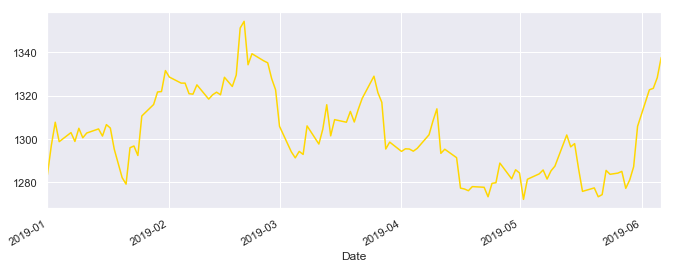

In [316]:
df_gold_1['Price'].plot(linewidth=1.5, color = 'gold')

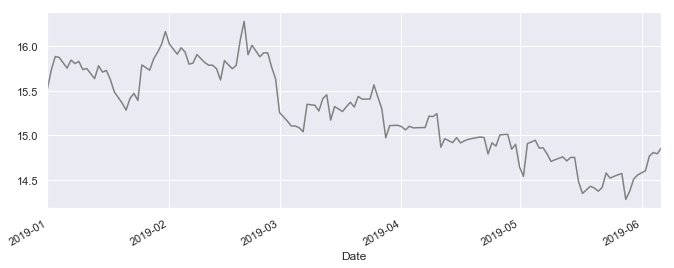

In [315]:
df_silver_1['Price'].plot(linewidth=1.5, color = 'gray')

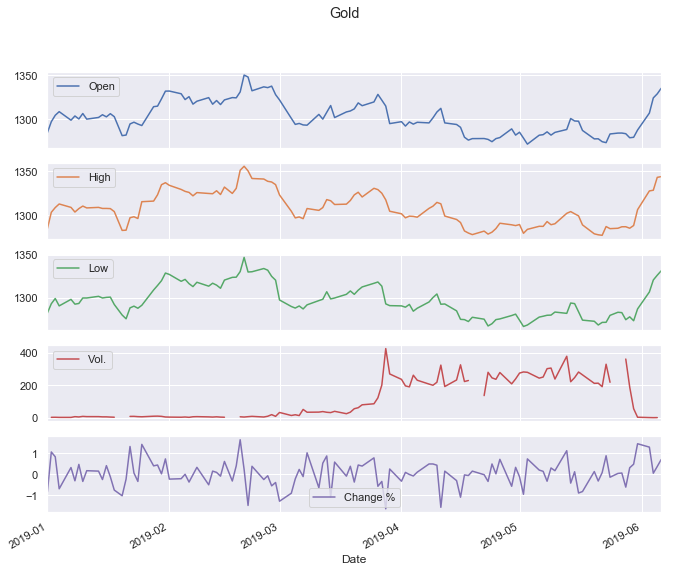

In [324]:
cols_plot = ['Open', 'High', 'Low','Vol.','Change %']
# axes = df_gold_1[cols_plot].plot(marker='o', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
axes = df_gold_1[cols_plot].plot(linewidth=1.5, figsize=(11, 9), title=('Gold'), subplots=True)

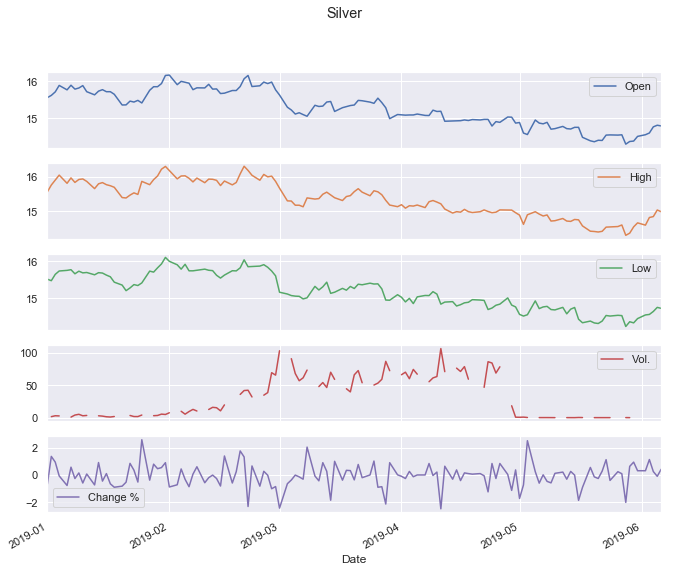

In [325]:
cols_plot = ['Open', 'High', 'Low','Vol.','Change %']
# axes = df_gold_1[cols_plot].plot(marker='o', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
axes = df_silver_1[cols_plot].plot(linewidth=1.5, figsize=(11, 9),title=('Silver'), subplots=True)

In [327]:
dfg = df_gold_1['Price'].copy()
dfs = df_silver_1['Price'].copy()

# Part.3 Stationary or not?

## 3.1 Visually 

Review a time series plot of the data and visually check if there are any obvious trends or seasonality.

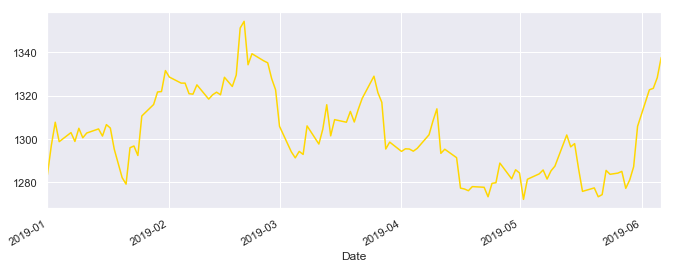

In [329]:
df_gold_1['Price'].plot(linewidth=1.5, color = 'gold')

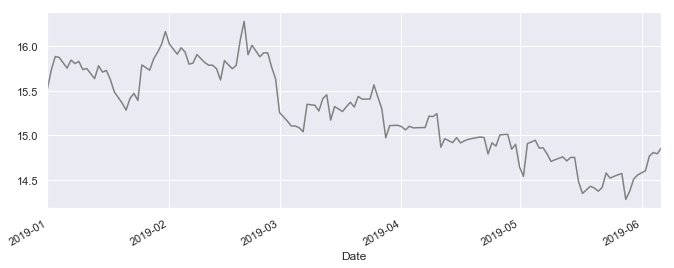

In [330]:
df_silver_1['Price'].plot(linewidth=1.5, color = 'gray')

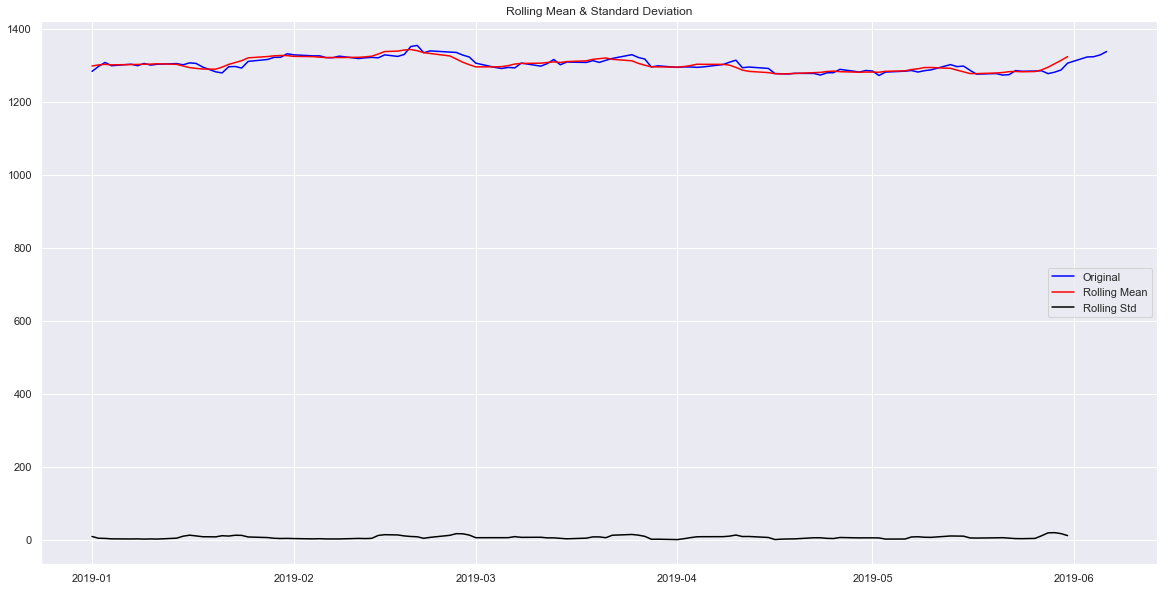

In [331]:
#Determing rolling statistics
rolmean = df_gold_1['Price'].rolling(window = 5).mean()
rolstd = df_gold_1['Price'].rolling(window = 5).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(df_gold_1['Price'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

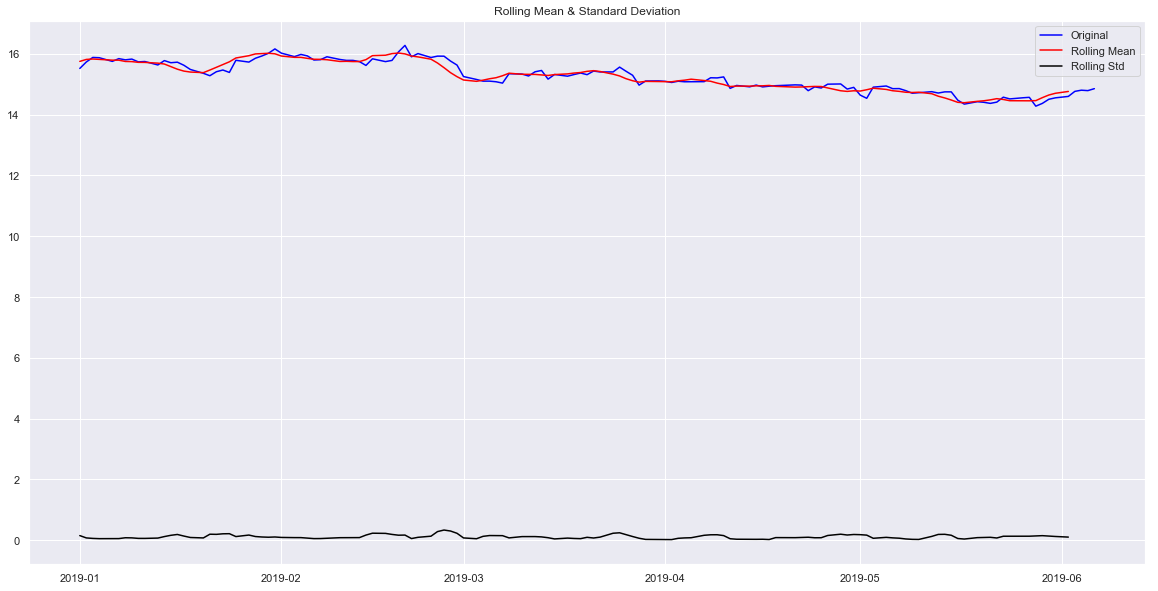

In [332]:
#Determing rolling statistics
rolmean = df_silver_1['Price'].rolling(window = 5).mean()
rolstd = df_silver_1['Price'].rolling(window = 5).std()

#Plot rolling statistics:
plt.figure(figsize=(20,10))
orig = plt.plot(df_silver_1['Price'], color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Both of them have no obvious trend or seasonality.

#### < Lag plots >

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Lag plots-Gold Price')

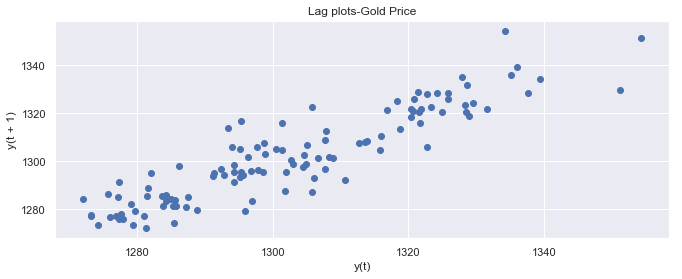

In [338]:
from pandas.plotting import lag_plot
lag_plot(df_gold_1['Price']).set_title('Lag plots-Gold Price')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Lag plots-Silver Price')

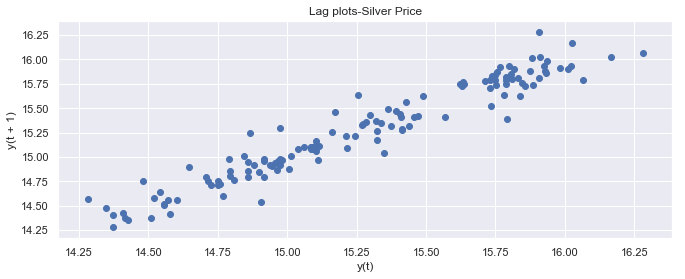

In [339]:
from pandas.plotting import lag_plot
lag_plot(df_silver_1['Price']).set_title('Lag plots-Silver Price')

Lag plots are used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random. So clearly both gold and silver price here are NOT random.

#### < Autocorrelation plots >

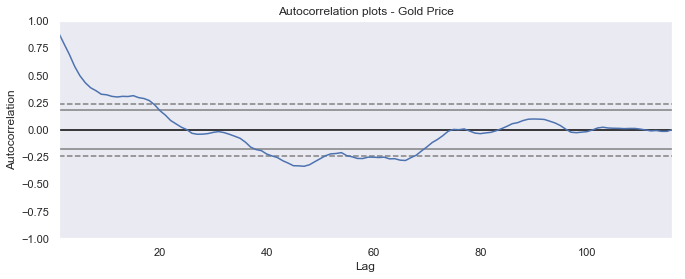

In [341]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_gold_1['Price']).set_title('Autocorrelation plots - Gold Price');

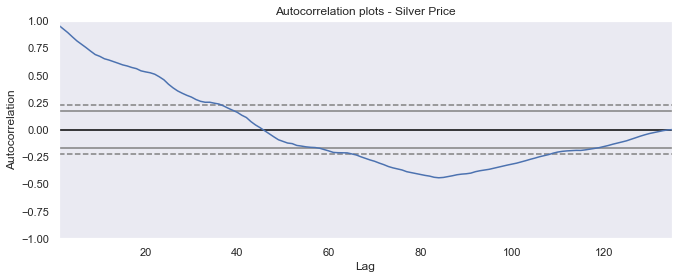

In [342]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_silver_1['Price']).set_title('Autocorrelation plots - Silver Price');

Autocorrelation plots are often used for checking randomness in time series.  If time series is random, such autocorrelations should be near zero for any and all time-lag separations. Clearly both of the gold and silver price are NOT random. It's just me doing double check here for the randomness.

After visually checking all the above plots, I still can not give a clear answer of whether the price data of both are stationary or not. Thus, I have to move on to step two, which is using summary statistics of split data.

## 3.2 Summary Statistics

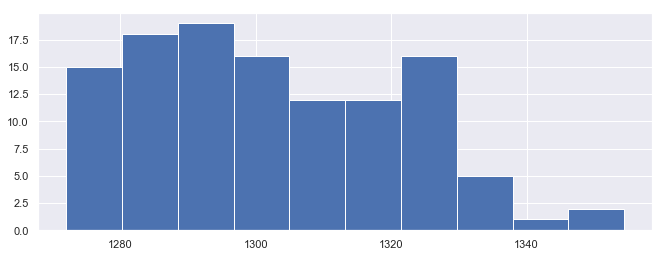

In [349]:
# plot histogram
df_gold_1['Price'].hist()
plt.show()

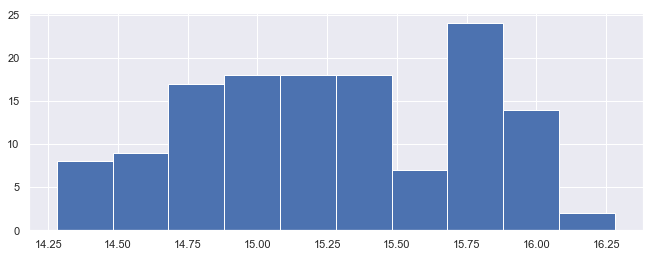

In [350]:
# plot histogram
df_silver_1['Price'].hist()
plt.show()

Next, I will split the time series into two contiguous sequences. 
We can then calculate the mean and variance of each group of numbers and compare the values.

In [351]:
X = df_gold_1['Price'].values
split = int(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1_gold=%.2f, mean2_gold=%.2f' % (mean1, mean2))
print('variance1_gold=%.2f, variance2_gold=%.2f' % (var1, var2))

mean1_gold=1293.07, mean2_gold=1312.08
variance1_gold=265.79, variance2_gold=271.63


In [352]:
Xs = df_silver_1['Price'].values
split = int(len(Xs) / 2)
X1s, X2s = Xs[0:split], X[split:]
mean1s, mean2s = X1s.mean(), X2s.mean()
var1s, var2s = X1s.var(), X2s.var()
print('mean1_silver=%.2f, mean2_silver=%.2f' % (mean1s, mean2s))
print('variance1_silver=%.2f, variance2_silver=%.2f' % (var1s, var2s))

mean1_silver=14.86, mean2_silver=1313.33
variance1_silver=0.08, variance2_silver=302.94


The result shows that the mean and variance values of the gold price are different, but almost in the same ball-park, while for the silver price, they are totally different.
However, this is a quick and dirty method that may be easily fooled.
Thus for the next step I will use a statistical test to check if the two price datasets are stationary or not.

## 3.3 Statistical Tests (Augmented Dickey-Fuller test)

In [353]:
from statsmodels.tsa.stattools import adfuller

def Dickey_Fuller_test(timeseries):
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [355]:
# from statsmodels.tsa.stattools import adfuller
# X = df_gold_1['Price']
# result = adfuller(X)
# print('ADF Statistic: %f' % result[0])
# print('p-value: %f' % result[1])
# print('Critical Values:')
# for key, value in result[4].items():
#     print('\t%s: %.3f' % (key, value))

#### Gold price

In [354]:
Dickey_Fuller_test(df_gold_1['Price'])

Results of Dickey-Fuller Test:
Test Statistic                  -2.597679
p-value                          0.093478
#Lags Used                       0.000000
Number of Observations Used    115.000000
Critical Value (1%)             -3.488535
Critical Value (5%)             -2.887020
Critical Value (10%)            -2.580360
dtype: float64


#### Silver price

In [356]:
Dickey_Fuller_test(df_silver_1['Price'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.615239
p-value                          0.475226
#Lags Used                       0.000000
Number of Observations Used    134.000000
Critical Value (1%)             -3.480119
Critical Value (5%)             -2.883362
Critical Value (10%)            -2.578407
dtype: float64


Null Hypothesis (H0): the time series can be represented by a unit root, that it is NOT stationary. 

Alternate Hypothesis (H1): the time series is stationary.

We interpret this result using the p-value from the test. 
A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

## 3.4 Result

#### Gold price ---> Non-stationary
    p-value: 0.093478 which obviously > 0.05, so the gold price data is non-stationary
    
#### Silver price ---> Non-stationary
    p-value: 0.475226 which obviously > 0.05, so the silver price data is non-stationary too

## 3.5 Further Explore

In [465]:
df_first_difference = df_gold_1['Price'] - df_gold_1['Price'].shift(1)    
df_first_difference_s = df_silver_1['Price'] - df_silver_1['Price'].shift(1)    

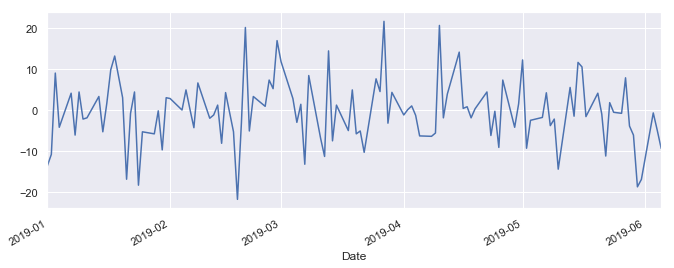

In [466]:
D_data = df_first_difference.dropna(inplace=False)  
D_data.plot() 

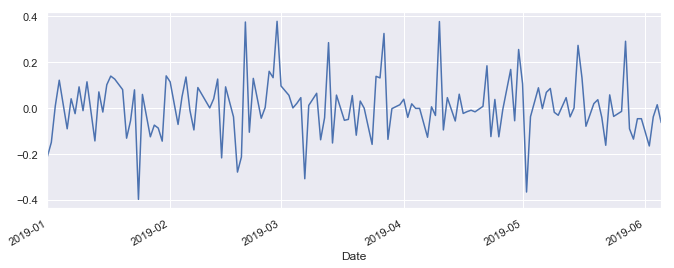

In [467]:
D_data_s = df_first_difference_s.dropna(inplace=False)   
D_data_s.plot()

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



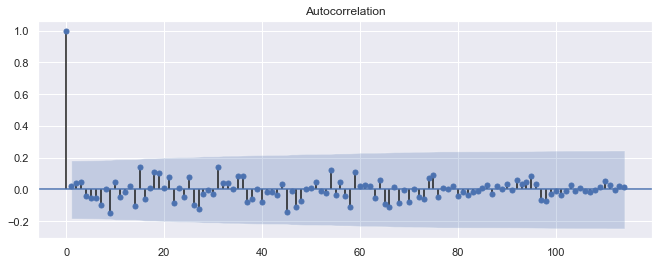

In [468]:
plot_acf(D_data).show()

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



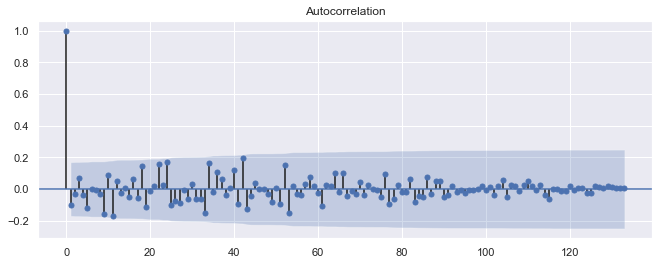

In [469]:
plot_acf(D_data_s).show()

In [470]:
print("Gold Price: ")
Dickey_Fuller_test(df_first_difference.dropna(inplace=False))

Gold Price: 
Results of Dickey-Fuller Test:
Test Statistic                -1.027074e+01
p-value                        4.007787e-18
#Lags Used                     0.000000e+00
Number of Observations Used    1.140000e+02
Critical Value (1%)           -3.489058e+00
Critical Value (5%)           -2.887246e+00
Critical Value (10%)          -2.580481e+00
dtype: float64


In [471]:
print("Silver Price: ")
Dickey_Fuller_test(df_first_difference_s.dropna(inplace=False))

Silver Price: 
Results of Dickey-Fuller Test:
Test Statistic                -1.259539e+01
p-value                        1.783531e-23
#Lags Used                     0.000000e+00
Number of Observations Used    1.330000e+02
Critical Value (1%)           -3.480500e+00
Critical Value (5%)           -2.883528e+00
Critical Value (10%)          -2.578496e+00
dtype: float64


###     Gold price (after first order difference) ---> Stationary
    (p-value: 4.007787e-18 which obviously < 0.05)
###     Silver price (after first order difference) ---> Stationary
    (p-value: 1.783531e-23 which obviously < 0.05)
### Due to the following reasons, I decide to use ARIMA model.
#### 1. Both the gold and silver price data are non-stationary.
#### 2. Both of them become stationary after first order differencing.
#### 3. Both of them are not random data.

# Part.4 Build the ARIMA model

#### < Gold Price >

In [373]:
from statsmodels.tsa.arima_model import ARIMA

# try to find the relative best model
df_gold_1['Price'] = df_gold_1['Price'].astype(float)

# order determination
pmax = int(len(D_data)/10) # usually order should be smaller than length/10
qmax = int(len(D_data)/10) # usually order should be smaller than length/10
bic_matrix = [] # bic matrix

for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: 
            tmp.append(ARIMA(df_gold_1['Price'], (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) 

p,q = bic_matrix.stack().idxmin() # use idxmin find the optimal 
print('BIC最小的p值和q值为：%s、%s' %(p,q))

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarnin

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



BIC最小的p值和q值为：0、0


/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



#### < Silver Price >

In [387]:
from statsmodels.tsa.arima_model import ARIMA

# try to find the relative best model
df_silver_1['Price'] = df_silver_1['Price'].astype(float)

# order determination
pmax = int(len(D_data_s)/10) # usually order should be smaller than length/10
qmax = int(len(D_data_s)/10) # usually order should be smaller than length/10
bic_matrix = [] # bic matrix

for p in range(pmax+1):
    tmp = []
    for q in range(qmax+1):
        try: 
            tmp.append(ARIMA(df_silver_1['Price'], (p,1,q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

bic_matrix = pd.DataFrame(bic_matrix) 

p,q = bic_matrix.stack().idxmin() # use idxmin find the optimal 
print('BIC smallest p & q values are：%s、%s' %(p,q))

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. foreca

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarnin

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:634: RuntimeWarning:

invalid value encountered in log

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning:

invalid value encountered in log

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated f

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:650: RuntimeWa

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInve

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInve

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInve

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning:

divide by zero encountered in true_divide

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning:

invalid value encountered in add

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning:

invalid value encountered in multiply

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/stats

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/p

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



BIC smallest p & q values are：0、0


/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available

/Users/guanmingshen/anaconda3/envs/guanming/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



# Part.5 Make Predictions

## < Gold >

In [397]:
df = df_gold_1['Price'].reset_index(drop=True)

predicted=1328.500549, expected=1331.600000
predicted=1331.534239, expected=1321.900000
predicted=1321.730645, expected=1321.700000
predicted=1321.530319, expected=1315.900000
predicted=1315.671053, expected=1310.600000
predicted=1310.318229, expected=1292.300000
predicted=1291.832474, expected=1296.700000
predicted=1296.282143, expected=1295.900000
predicted=1295.478283, expected=1279.050000
predicted=1278.464000, expected=1282.050000
predicted=1281.499505, expected=1295.200000
predicted=1294.783824, expected=1305.000000
predicted=1304.683010, expected=1306.600000
predicted=1306.301442, expected=1301.300000
predicted=1300.953810, expected=1304.600000
predicted=1304.288208, expected=1302.700000
predicted=1302.373364, expected=1300.500000
predicted=1300.156019, expected=1304.900000
predicted=1304.599541, expected=1298.800000
predicted=1298.446818, expected=1302.900000
predicted=1302.586937, expected=1298.700000
predicted=1298.352232, expected=1307.700000
predicted=1307.434956, expected=

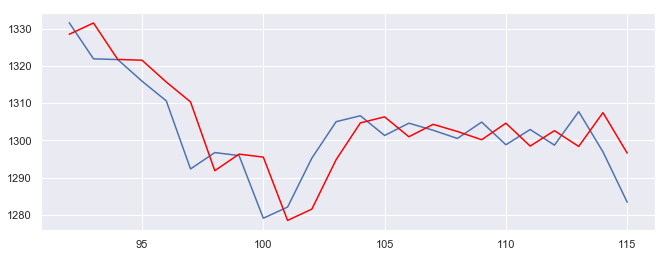

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  114
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -398.800
Method:                           css   S.D. of innovations              7.999
Date:                Mon, 10 Jun 2019   AIC                            801.600
Time:                        00:28:54   BIC                            807.073
Sample:                             1   HQIC                           803.821
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3575      0.749     -0.477      0.634      -1.826       1.111
==============================================================================
"""

In [398]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X = df
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]
# print(test)
history = [x for x in train]

predictions = list()
forecast_errors = []

for t in range(size, size + len(test)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    forecast_errors.append(obs - yhat)   
    print('predicted=%f, expected=%f' % (yhat, obs))

# calcuate three kinds of forecast error
mse_error = mean_squared_error(test, predictions)
mae_error = mean_absolute_error(test, predictions)
forecast_bias = sum(forecast_errors) * 1.0/len(test)

print('Test Mean Squared Error: %.3f' % mse_error)
print('Test Mean Absolute Error: %.3f' % mae_error)
print('Forecast Bias: %f' % forecast_bias)

# plot
pyplot.plot(test)
pyplot.plot(range(size, len(X)), predictions, color='red')
pyplot.show()

model_fit.summary() 

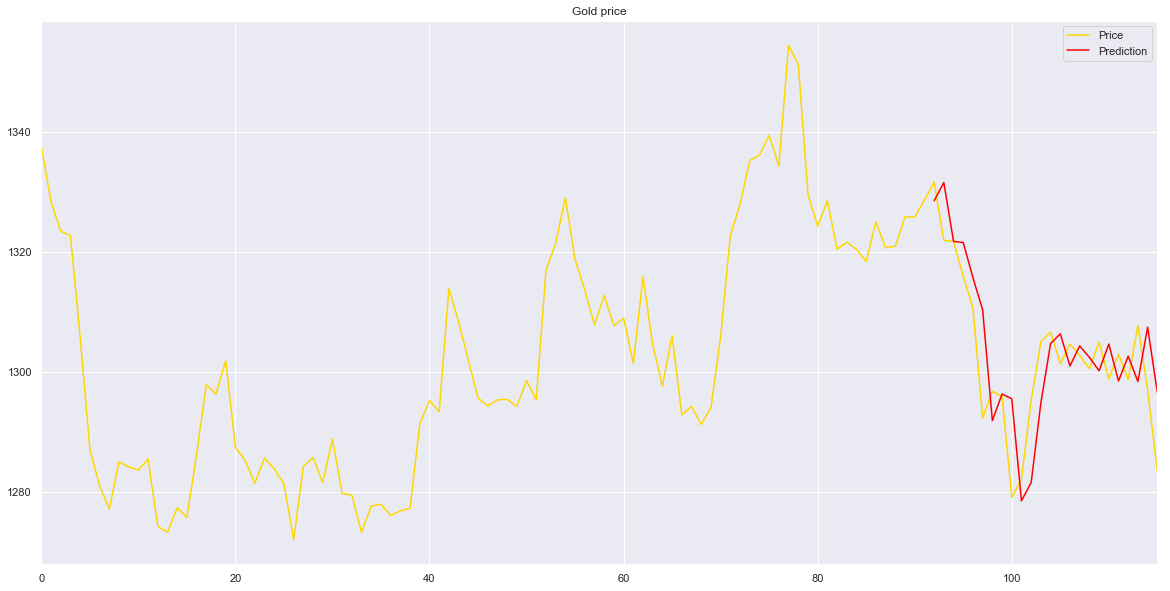

In [459]:
future_forecast = pd.DataFrame(predictions, index = test.index, columns=['Prediction'])
df_predic = pd.concat([df,future_forecast],axis=1)
df_predic.plot(figsize=(20,10), color=['gold','red'], title=('Gold price'))

In [460]:
# Next 5 days' prediction, the returned arrays are prediction value, standard error, and confidence interval.
model_fit.forecast(5)

(array([1296.54254386, 1296.18508772, 1295.82763158, 1295.47017544,
        1295.1127193 ]),
 array([ 7.99893697, 11.31220515, 13.85456524, 15.99787394, 17.88616681]),
 array([[1280.86491548, 1312.22017224],
        [1274.01357304, 1318.35660239],
        [1268.67318269, 1322.98208047],
        [1264.11491869, 1326.82543219],
        [1260.05647652, 1330.16896207]]))

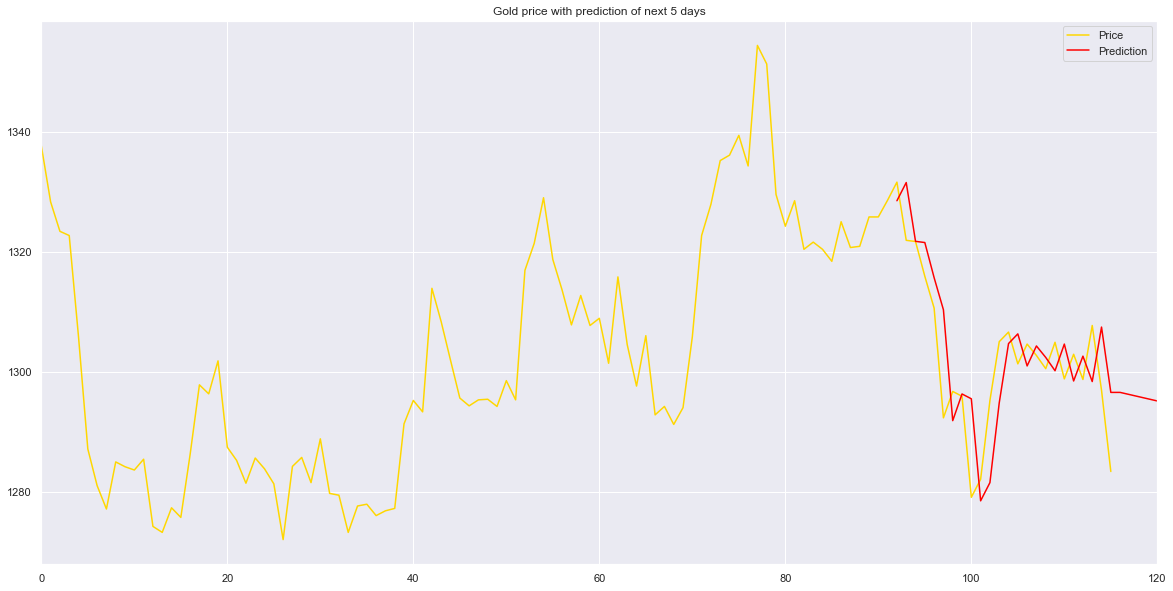

In [462]:
prd_5_gold = pd.DataFrame([1296.54254386, 1296.18508772, 1295.82763158, 1295.47017544,
        1295.1127193],  columns=['Prediction'])
prd_5_gold.index = prd_5_gold.index + 116

future_forecast = pd.DataFrame(predictions, index = test.index, columns=['Prediction'])
future_forecast_g_5 = future_forecast.append(prd_5_gold)
df_predic = pd.concat([df, future_forecast_g_5],axis=1)
df_predic.plot(figsize=(20,10), color=['gold','red'], title=('Gold price with prediction of next 5 days'))

In [402]:
model_fit.forecast(10)

(array([1296.54254386, 1296.18508772, 1295.82763158, 1295.47017544,
        1295.1127193 , 1294.75526316, 1294.39780702, 1294.04035088,
        1293.68289474, 1293.3254386 ]),
 array([ 7.99893697, 11.31220515, 13.85456524, 15.99787394, 17.88616681,
        19.59331406, 21.16319798, 22.6244103 , 23.99681091, 25.29485969]),
 array([[1280.86491548, 1312.22017224],
        [1274.01357304, 1318.35660239],
        [1268.67318269, 1322.98208047],
        [1264.11491869, 1326.82543219],
        [1260.05647652, 1330.16896207],
        [1256.35307326, 1333.15745306],
        [1252.91870119, 1335.87691285],
        [1249.69732153, 1338.38338023],
        [1246.65000961, 1340.71577986],
        [1243.74842462, 1342.90245257]]))

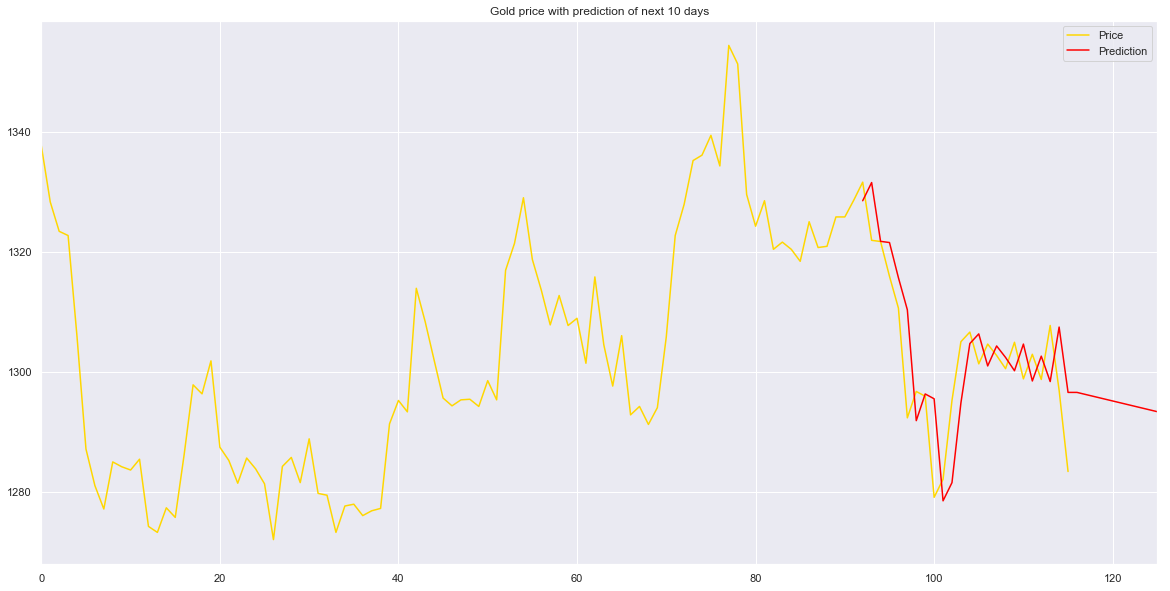

In [464]:
prd_10_gold = pd.DataFrame([1296.54254386, 1296.18508772, 1295.82763158, 1295.47017544,
        1295.1127193 , 1294.75526316, 1294.39780702, 1294.04035088,
        1293.68289474, 1293.3254386],  columns=['Prediction'])
prd_10_gold.index = prd_10_gold.index + 116

future_forecast = pd.DataFrame(predictions, index = test.index, columns=['Prediction'])
future_forecast_g_10 = future_forecast.append(prd_10_gold)
df_predic = pd.concat([df, future_forecast_g_10],axis=1)
df_predic.plot(figsize=(20,10), color=['gold','red'], title=('Gold price with prediction of next 10 days'))

#### As we can see from the above red line, the gold price will probably decrease a little bit in the next 5-10 days.

## < Silver >

In [405]:
df_s = df_silver_1['Price'].reset_index(drop=True)

predicted=16.036925, expected=16.166000
predicted=16.178120, expected=16.021000
predicted=16.031679, expected=15.933000
predicted=15.942782, expected=15.858000
predicted=15.867018, expected=15.732000
predicted=15.739812, expected=15.791000
predicted=15.799265, expected=15.392000
predicted=15.396693, expected=15.471000
predicted=15.476339, expected=15.415000
predicted=15.419810, expected=15.283000
predicted=15.286641, expected=15.363000
predicted=15.367288, expected=15.489000
predicted=15.494311, expected=15.628000
predicted=15.634425, expected=15.729000
predicted=15.736207, expected=15.711000
predicted=15.718000, expected=15.781000
predicted=15.788512, expected=15.637000
predicted=15.643290, expected=15.751000
predicted=15.758152, expected=15.739000
predicted=15.746000, expected=15.831000
predicted=15.838669, expected=15.806000
predicted=15.813414, expected=15.846000
predicted=15.853667, expected=15.755000
predicted=15.761908, expected=15.876000
predicted=15.883779, expected=15.885000


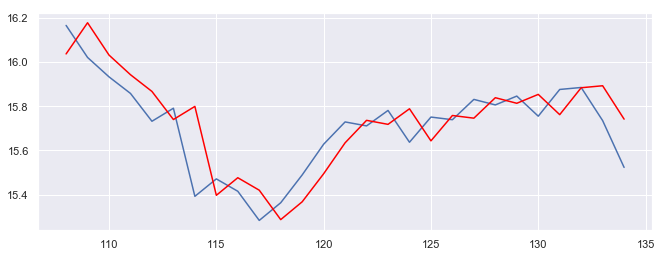

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  133
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  82.109
Method:                           css   S.D. of innovations              0.131
Date:                Mon, 10 Jun 2019   AIC                           -160.218
Time:                        00:33:41   BIC                           -154.438
Sample:                             1   HQIC                          -157.869
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0066      0.011      0.583      0.561      -0.016       0.029
==============================================================================
"""

In [407]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

X_s = df_s
size_s = int(len(X_s) * 0.8)
train_s, test_s = X_s[0:size_s], X_s[size_s:len(X_s)]
# print(test)
history_s = [X_s for X_s in train_s]

predictions_s = list()
forecast_errors_s = []

for t_s in range(size_s, size_s + len(test_s)):
    model_s = ARIMA(history_s, order=(0,1,0))
    model_fit_s = model_s.fit(disp=0)
    output_s = model_fit_s.forecast()
    yhat_s = output_s[0]
    predictions_s.append(yhat_s)
    obs_s = test_s[t_s]
    history_s.append(obs_s)
    forecast_errors_s.append(obs_s - yhat_s)   
    print('predicted=%f, expected=%f' % (yhat_s, obs_s))

# calcuate three kinds of forecast error
mse_error_s = mean_squared_error(test_s, predictions_s)
mae_error_s = mean_absolute_error(test_s, predictions_s)
forecast_bias_s = sum(forecast_errors_s) * 1.0/len(test_s)

print('Test Mean Squared Error: %.3f' % mse_error_s)
print('Test Mean Absolute Error: %.3f' % mae_error_s)
print('Forecast Bias: %f' % forecast_bias_s)

# plot
pyplot.plot(test_s)
pyplot.plot(range(size_s, len(X_s)), predictions_s, color='red')
pyplot.show()

model_fit_s.summary() 

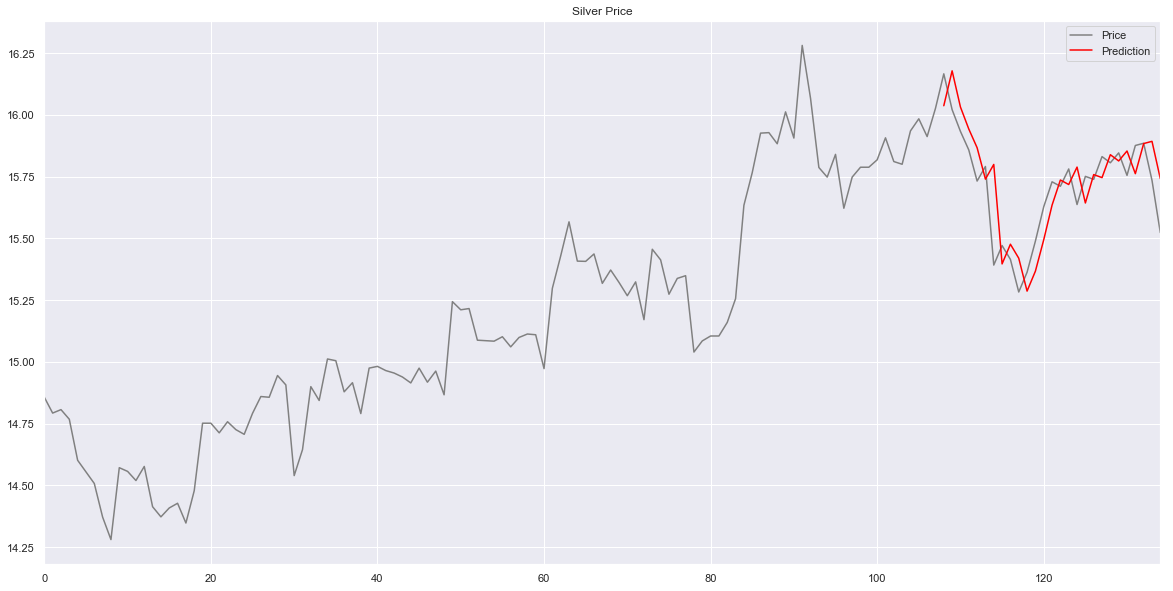

In [451]:
future_forecast_s = pd.DataFrame(predictions_s, index = test_s.index, columns=['Prediction'])
df_predic_s = pd.concat([df_s, future_forecast_s],axis=1)
df_predic_s.plot(figsize=(20,10), color=['gray','red'], title='Silver Price')

In [452]:
# Next 5 days' prediction, the returned arrays are prediction value, standard error, and confidence interval.
model_fit_s.forecast(5)

(array([15.7416015 , 15.74820301, 15.75480451, 15.76140601, 15.76800752]),
 array([0.13051068, 0.18456997, 0.22605112, 0.26102135, 0.29183074]),
 array([[15.48580528, 15.99739773],
        [15.38645252, 16.1099535 ],
        [15.31175245, 16.19785657],
        [15.24981356, 16.27299846],
        [15.19602977, 16.33998527]]))

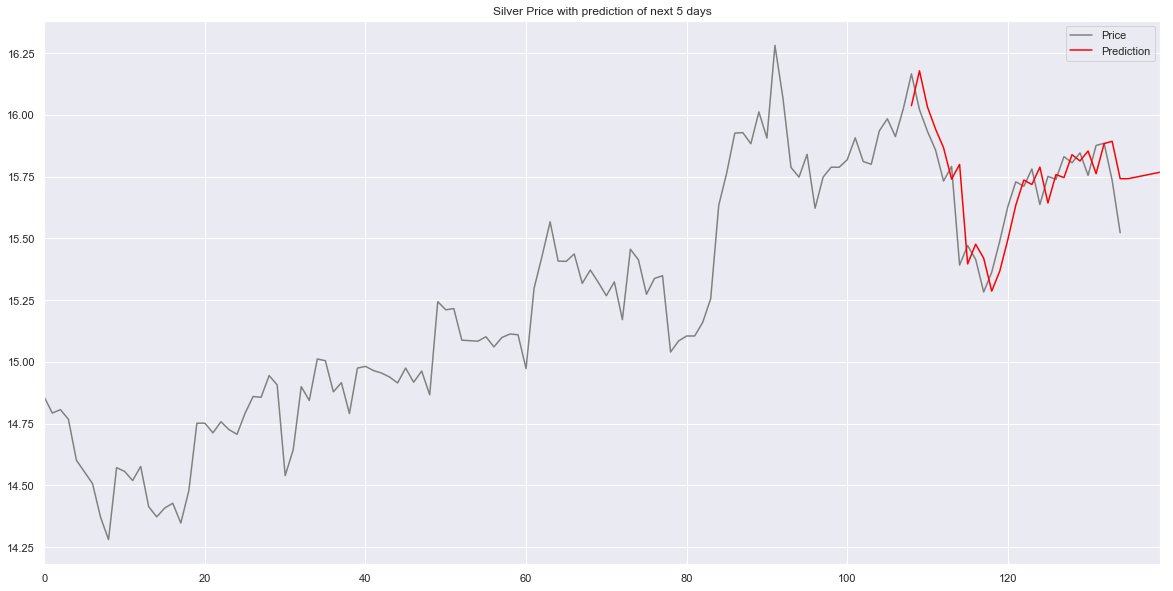

In [453]:
prd_5 = pd.DataFrame([15.7416015 , 15.74820301, 15.75480451, 15.76140601, 15.76800752],  columns=['Prediction'])
prd_5.index=prd_5.index+135
future_forecast_s = pd.DataFrame(predictions_s, index = test_s.index, columns=['Prediction'])
future_forecast_s_5 = future_forecast_s.append(prd_5)
df_predic_s = pd.concat([df_s, future_forecast_s_5],axis=1)
df_predic_s.plot(figsize=(20,10), color=['gray','red'], title='Silver Price with prediction of next 5 days')

In [454]:
model_fit_s.forecast(10)

(array([15.7416015 , 15.74820301, 15.75480451, 15.76140601, 15.76800752,
        15.77460902, 15.78121052, 15.78781203, 15.79441353, 15.80101503]),
 array([0.13051068, 0.18456997, 0.22605112, 0.26102135, 0.29183074,
        0.31968456, 0.34529879, 0.36913994, 0.39153203, 0.412711  ]),
 array([[15.48580528, 15.99739773],
        [15.38645252, 16.1099535 ],
        [15.31175245, 16.19785657],
        [15.24981356, 16.27299846],
        [15.19602977, 16.33998527],
        [15.14803879, 16.40117925],
        [15.10443732, 16.45798372],
        [15.06431104, 16.51131301],
        [15.02702485, 16.56180221],
        [14.99211634, 16.60991372]]))

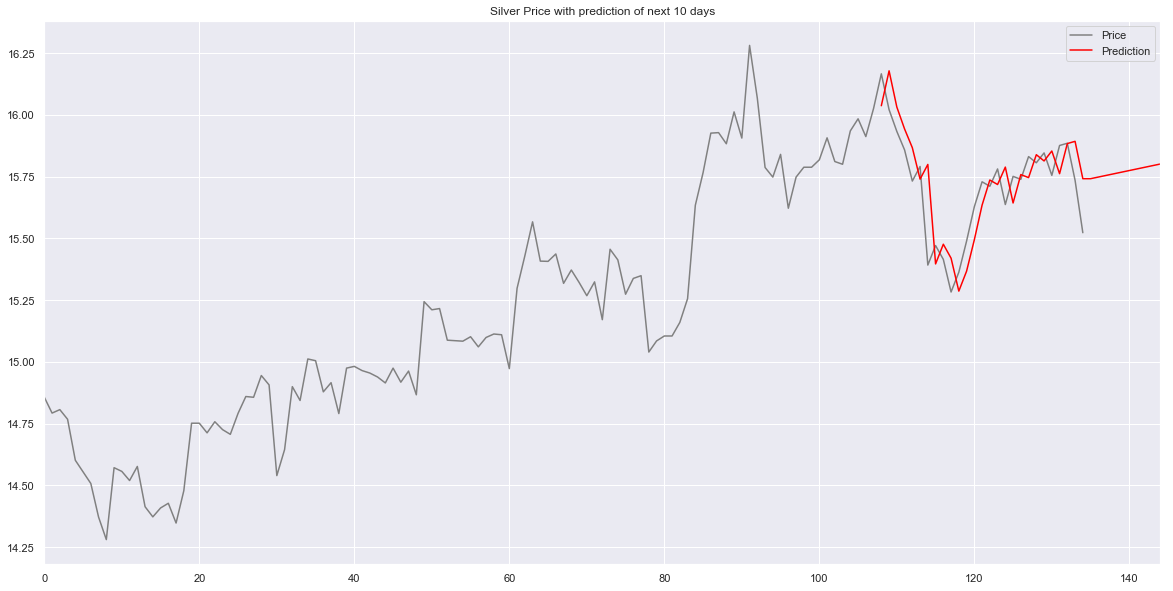

In [457]:
prd_10 = pd.DataFrame([15.7416015 , 15.74820301, 15.75480451, 15.76140601, 15.76800752,
        15.77460902, 15.78121052, 15.78781203, 15.79441353, 15.80101503],  columns=['Prediction'])
prd_10.index = prd_10.index+135
future_forecast_s = pd.DataFrame(predictions_s, index = test_s.index, columns=['Prediction'])
future_forecast_s_10 = future_forecast_s.append(prd_10)
df_predic_s = pd.concat([df_s, future_forecast_s_10],axis=1)
df_predic_s.plot(figsize=(20,10), color=['gray','red'], title='Silver Price with prediction of next 10 days')

#### As we can see from the above red line, the silver price will probably increase a little bit in the next 5-10 days.